In [5]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import datetime as dt
import pandas as pd
mpl.rc('xtick', labelsize=14) 
mpl.rc('ytick', labelsize=14) 
mpl.rc('legend', fontsize=16) 
mpl.rc('axes', titlesize=16) 
mpl.rc('figure', titlesize=16) 
mpl.rc('axes', labelsize=16) 
mpl.rc('font', size=16) 
mpl.rc('legend', numpoints= 1)
mpl.rc('lines', markersize= 8)
%matplotlib inline

(0, 1)

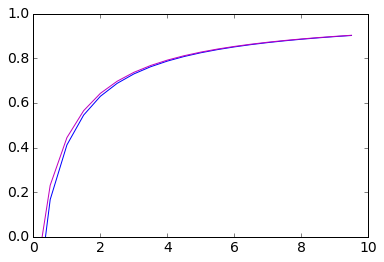

In [2]:
x=np.arange(0,10,.5)
plt.plot(x,(x-.3)/(1+x-.3),'b-')
plt.plot(x,(x-.2)/(1+x-.2),'m-')
plt.ylim(0,1)

In [41]:
zz_rate_uzoo_PredSlope = 0.5
zz_rate_uzoo_HalfSat = 1.25
zz_rate_uzoo_MicroPref = .16
zz_rate_uzoo_NanoPref = .17
zz_rate_uzoo_PicoPref = .4
zz_rate_uzoo_PON_Pref = .09
zz_rate_uzoo_Z_Pref= .18

zz_rate_uzoo_MicroPredSlope = .3
zz_rate_uzoo_MicroHalfSat = 5.0


In [31]:
zz_rate_uzoo_MicroPref+zz_rate_uzoo_NanoPref+zz_rate_uzoo_PicoPref+zz_rate_uzoo_PON_Pref+zz_rate_uzoo_Z_Pref


1.0

In [32]:
zz_P_diat =9.99528333333
zz_P_myri =0.737766666667
zz_P_nano =0.806
zz_D_PON =0.0982833333333
zz_Z = 1.68191666667

In [42]:
zz_food_limitation = (zz_P_diat + zz_P_myri + zz_P_nano + zz_D_PON + zz_Z - zz_rate_uzoo_PredSlope) / \
    (zz_rate_uzoo_HalfSat + zz_P_diat + zz_P_myri + zz_P_nano + zz_D_PON + zz_Z - zz_rate_uzoo_PredSlope)

zz_denominator = zz_rate_uzoo_MicroPref * zz_P_diat + zz_rate_uzoo_NanoPref * zz_P_myri + \
        zz_rate_uzoo_PicoPref * zz_P_nano + zz_rate_uzoo_PON_Pref * zz_D_PON + zz_rate_uzoo_Z_Pref * zz_Z

L1 = zz_rate_uzoo_MicroPref * zz_food_limitation * zz_P_diat / zz_denominator 
L2= (zz_P_diat - zz_rate_uzoo_MicroPredSlope) / (zz_rate_uzoo_MicroHalfSat + zz_P_diat - zz_rate_uzoo_MicroPredSlope)
    
zz_uZoo_mort_micro = np.min(L1,L2)

/home/eolson/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:29: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return umr_minimum(a, axis, None, out, keepdims)


In [26]:
L1

0.7224473970922062

In [35]:
L1

0.6177917811488677

In [27]:
L2

0.9065008407132448

In [43]:
L2

0.6597547739239824

In [29]:
N1=zz_rate_uzoo_PicoPref * zz_food_limitation * zz_P_nano / zz_denominator 
N1

0.06721931303891426

In [17]:
zz_day=np.arange(1,367) # in model, nday_year starts at 1 on jan 1
dts=[dt.datetime(2014,12,31)+dt.timedelta(days=float(ii)) for ii in zz_day]
zz_day=np.expand_dims(zz_day,1)
zz_MesZoBar = zz_rate_mesozoo_winterconc + \
        zz_rate_mesozoo_summerconc*(np.sum ( zz_rate_mesozoo_sumpeakval * \
                                            np.exp(-(zz_day-zz_rate_mesozoo_sumpeakpos)**2/zz_rate_mesozoo_sumpeakwid**2),1) \
                    + np.sum ( zz_rate_mesozoo_sumpeakval * \
                                            np.exp( -(zz_day-zz_rate_mesozoo_sumpeakpos-365.25)**2/zz_rate_mesozoo_sumpeakwid**2),1) \
                    + np.sum ( zz_rate_mesozoo_sumpeakval * \
                                            np.exp( -(zz_day-zz_rate_mesozoo_sumpeakpos+365.25)**2/zz_rate_mesozoo_sumpeakwid**2),1) )
zz_MesZoBar2 = zz_rate_mesozoo_winterconc + \
        zz_rate_mesozoo_summerconc*(np.sum ( 2*zz_rate_mesozoo_sumpeakval * \
                                            np.exp(-(zz_day-zz_rate_mesozoo_sumpeakpos)**2/zz_rate_mesozoo_sumpeakwid**2),1) \
                    + np.sum ( 2*zz_rate_mesozoo_sumpeakval * \
                                            np.exp( -(zz_day-zz_rate_mesozoo_sumpeakpos-365.25)**2/zz_rate_mesozoo_sumpeakwid**2),1) \
                    + np.sum ( 2*zz_rate_mesozoo_sumpeakval * \
                                            np.exp( -(zz_day-zz_rate_mesozoo_sumpeakpos+365.25)**2/zz_rate_mesozoo_sumpeakwid**2),1) )
zz_MesZoBar3 = zz_rate_mesozoo_winterconc2 + \
        zz_rate_mesozoo_summerconc*(np.sum ( zz_rate_mesozoo_sumpeakval2 * \
                                            np.exp(-(zz_day-zz_rate_mesozoo_sumpeakpos)**2/zz_rate_mesozoo_sumpeakwid2**2),1) \
                    + np.sum ( zz_rate_mesozoo_sumpeakval2 * \
                                            np.exp( -(zz_day-zz_rate_mesozoo_sumpeakpos-365.25)**2/zz_rate_mesozoo_sumpeakwid2**2),1) \
                    + np.sum ( zz_rate_mesozoo_sumpeakval2 * \
                                            np.exp( -(zz_day-zz_rate_mesozoo_sumpeakpos+365.25)**2/zz_rate_mesozoo_sumpeakwid2**2),1) )

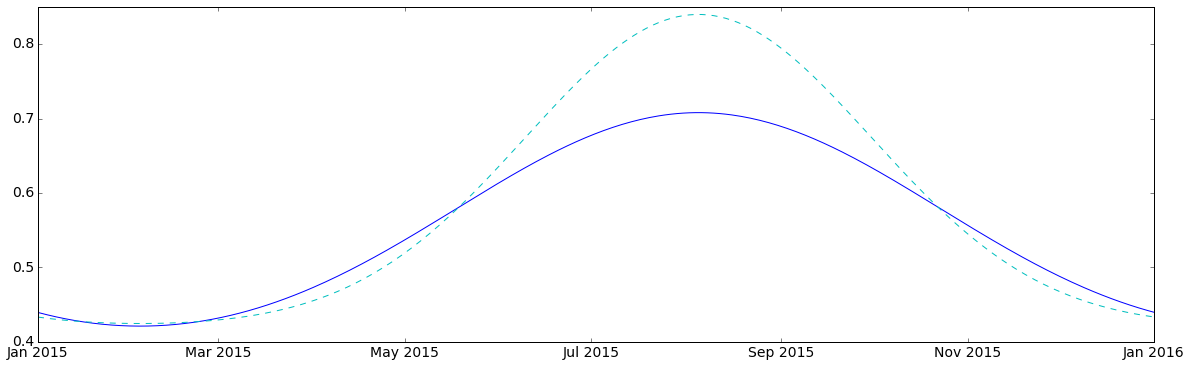

In [18]:
fig,ax=plt.subplots(1,1,figsize=(20,6))
ax.plot(dts,zz_MesZoBar,'b-')
#ax.plot(dts,zz_MesZoBar2,'r-')
ax.plot(dts,zz_MesZoBar3,'c--')

In [24]:
df=pd.read_excel('/ocean/eolson/MEOPAR/obs/MackasZoop/1-s2.0-S007966111300061X-mmc2.xls',skiprows=1)
df=df.dropna(0,how='any', subset=['Year','Month','Day']).dropna(1,how='any',thresh=200)

In [25]:
df.keys()


Index(['Sample ID', 'Station name', 'Longitude (deg W)', 'Latitude (deg N)',
       'Day', 'Month', 'Year', 'Decimal year', 'Local Time (hr)',
       'Day or Night', 'Net + Tow Type', 'Tow Depth Range (m)',
       'Bottom Depth (m)', 'Volume Filtered (m3)', 'Total Biomass',
       'Total Copepods', 'Calanoids<1mm', 'Calanoids 1-3mm', 'Calanoids 3-5mm',
       'Calanoids >5mm', 'Total Euphausiids >1 cm', 'E. pacifica > 1cm',
       'Thysanoessa >1cm', 'Gammarids', 'Hyperiids', 'Ostracods', 'Shrimps',
       'Crab larvae', 'Cladocerans', 'Chaetognaths', 'Pteropods', 'Larvaceans',
       'Polychaetes', 'Siphonophores', 'Medusae', 'Ctenophores'],
      dtype='object')

In [26]:
yd=[(dt.datetime(int(r.Year),int(r.Month),int(r.Day))-dt.datetime(int(r.Year)-1,12,31)).days for i,r in df.iterrows()]

In [32]:
df=df.assign(yd=yd).sort_values(by='yd')

In [35]:
dtsdf=[dt.datetime(2014,12,31)+dt.timedelta(days=int(ii)) for ii in df['yd'].values]

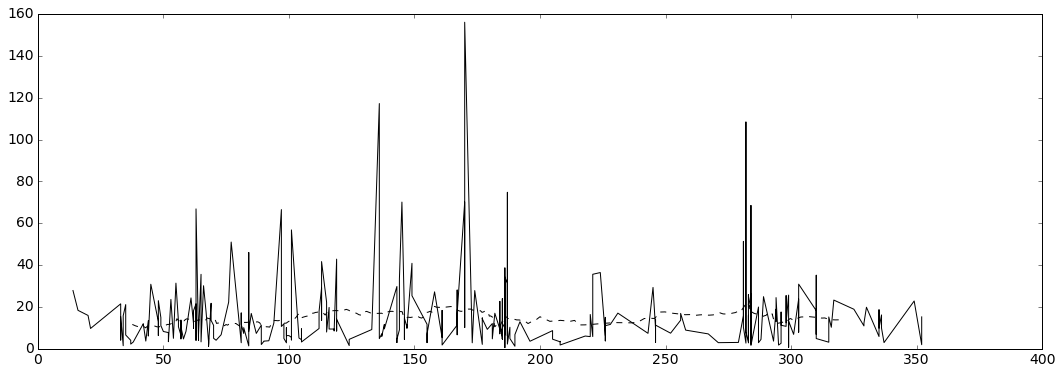

In [128]:
fig,ax=plt.subplots(1,1,figsize=(18,6))
ax.plot(df['yd'],df['Total Biomass'],'k-')
ax.plot(np.convolve(df['yd'], np.ones((30,))/30, mode='valid'),np.convolve(df['Total Biomass'].values, np.ones((30,))/30, mode='valid'),'k--')

In [212]:
#&nampismezo     !   parameters for microzooplankton
zz_rate_mesozoo_winterconc2       = 0.41       #uM N mesozooplankton background concentration
zz_rate_mesozoo_sumpeakval2 = np.expand_dims(np.array((0.14,   0.18,     .22)) ,0)     #uM N magnitude of mesozooplankton summer concentration peaks
zz_rate_mesozoo_sumpeakwid2 = np.expand_dims(np.array((50.0,   65.00,  80.00)),0)   # year-days widths of mesozooplankton summer concentration peaks,0)
zz_rate_mesozoo_sumpeakpos2 = np.expand_dims(np.array((281.000, 155.000, 218.00)),0)  # year-day times of mesozooplankton summer concentration peaks

zz_day=np.arange(1,367) # in model, nday_year starts at 1 on jan 1
dts=[dt.datetime(2014,12,31)+dt.timedelta(days=float(ii)) for ii in zz_day]
zz_day=np.expand_dims(zz_day,1)
zz_MesZoBar3 = zz_rate_mesozoo_winterconc2 + \
        zz_rate_mesozoo_summerconc*(np.sum ( zz_rate_mesozoo_sumpeakval2 * \
                                            np.exp(-(zz_day-zz_rate_mesozoo_sumpeakpos2)**2/zz_rate_mesozoo_sumpeakwid2**2),1) \
                    + np.sum ( zz_rate_mesozoo_sumpeakval2 * \
                                            np.exp( -(zz_day-zz_rate_mesozoo_sumpeakpos2-365.25)**2/zz_rate_mesozoo_sumpeakwid2**2),1) \
                    + np.sum ( zz_rate_mesozoo_sumpeakval2 * \
                                            np.exp( -(zz_day-zz_rate_mesozoo_sumpeakpos2+365.25)**2/zz_rate_mesozoo_sumpeakwid2**2),1) )

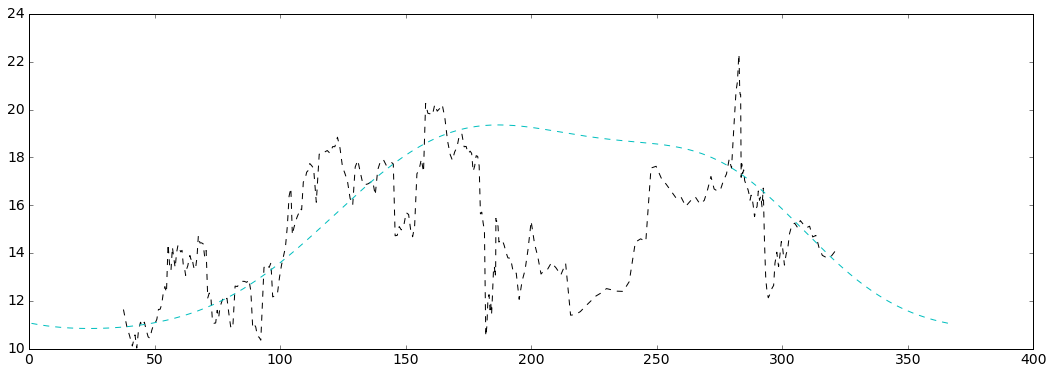

In [213]:
fig,ax=plt.subplots(1,1,figsize=(18,6))
#ax.plot(df['yd'],df['Total Biomass'],'k-')
ii=30
ax.plot(np.convolve(df['yd'], np.ones((ii,))/ii, mode='valid'),np.convolve(df['Total Biomass'].values, np.ones((ii,))/ii, mode='valid'),'k--')

ax.plot(zz_day,zz_MesZoBar3*26,'c--')

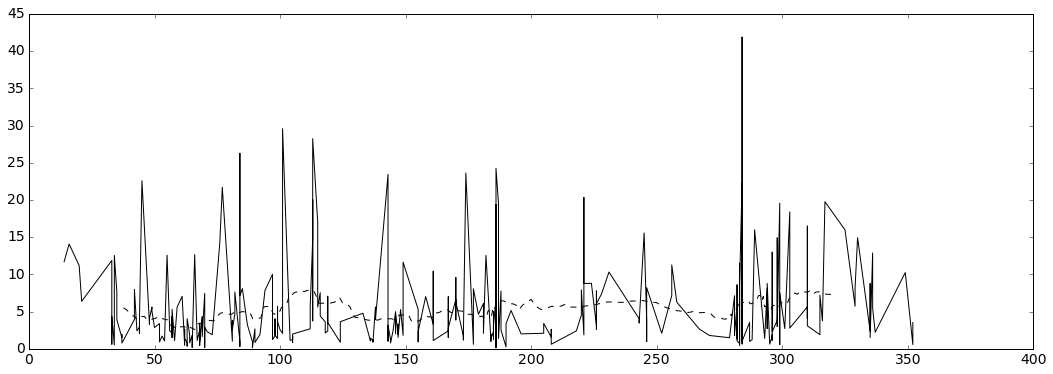

In [214]:
fig,ax=plt.subplots(1,1,figsize=(18,6))
ax.plot(df['yd'],df['Total Copepods'],'k-')
ii=30
ax.plot(np.convolve(df['yd'], np.ones((ii,))/ii, mode='valid'),np.convolve(df['Total Copepods'].values, np.ones((ii,))/ii, mode='valid'),'k--')

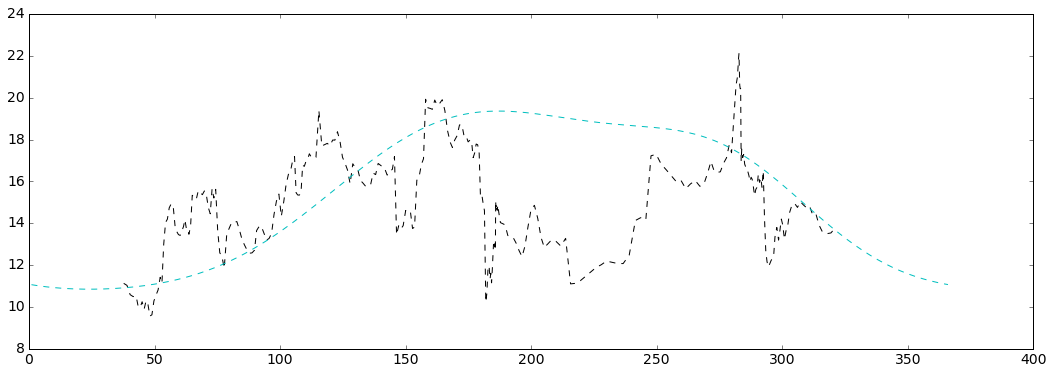

In [215]:
fig,ax=plt.subplots(1,1,figsize=(18,6))
#ax.plot(df['yd'],df['Total Copepods'],'k-')
ii=30
tdf=df.dropna(axis=0,subset=['Calanoids<1mm'])
ax.plot(np.convolve(tdf['yd'], np.ones((ii,))/ii, mode='valid'),np.convolve(tdf['Total Biomass'].values-tdf['Calanoids<1mm'].values, np.ones((ii,))/ii, mode='valid'),'k--')
ax.plot(zz_day,zz_MesZoBar3*26,'c--')